### Import Library

In [1]:
matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import neighbors
from matplotlib.colors import ListedColormap, BoundaryNorm
import matplotlib.patches as mpatches

### Load Data Set

In [2]:
data = pd.read_table('fruit_data.txt')  # Pastikan file data set berada dalam folder yang sama dengan file jupyter notebook

### Explore Data Set

In [3]:
print(data.shape)
data.head(10) # Menampilkan 10 baris pertama dari tabel

(59, 7)


,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79
5,2,mandarin,mandarin,80,5.8,4.3,0.77
6,2,mandarin,mandarin,80,5.9,4.3,0.81
7,2,mandarin,mandarin,76,5.8,4.0,0.81
8,1,apple,braeburn,178,7.1,7.8,0.92
9,1,apple,braeburn,172,7.4,7.0,0.89


In [4]:
## membuat dict key pair value  antara fruit_label dengan fruit_name
lookup_fruit_name = dict(zip(data.fruit_label.unique(), data.fruit_name.unique()))   
print(lookup_fruit_name)

{1: 'apple', 2: 'mandarin', 3: 'orange', 4: 'lemon'}


### Build model and train the data

In [5]:
# Pada kasus ini explanatory variablenya adalah mass, width dan height sedangkan target variablenya adalah fruit_label
X = data[['mass', 'width', 'height']]
y = data['fruit_label']


# kita akan mensplit menjadi 80% train data and 20% test data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

In [6]:
# Chek dimensi array dari massing masing variable
print('X_train = ', X_train.shape)
print('X_test = ', X_test.shape)
print('y_train = ', y_train.shape)
print('y_test = ', y_test.shape)

X_train =  (47, 3)
X_test =  (12, 3)
y_train =  (47,)
y_test =  (12,)


In [7]:
X_train.head()

,mass,width,height
30,158,7.1,7.5
41,180,7.6,8.2
33,190,7.5,8.1
42,154,7.2,7.2
48,174,7.3,10.1


In [8]:
y_train.head()

30    3
41    3
33    3
42    3
48    4
Name: fruit_label, dtype: int64

In [9]:
# Create classifier objet
knn = KNeighborsClassifier(n_neighbors = 5)

# Train the classifier using train data
knn.fit(X_train, y_train)

KNeighborsClassifier()

### Estimate the accuracy of the classifier on future data, using the test data

In [10]:
knn.score(X_test, y_test)

0.5833333333333334

### Plot the decision boundaries of the k-NN classifier

In [11]:
def plot_fruit_knn(X, y, n_neighbors, weights):
    X_mat = X[['height', 'width']].as_matrix()
    y_mat = y.as_matrix()

    # Create color maps
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF','#AFAFAF'])
    cmap_bold  = ListedColormap(['#FF0000', '#00FF00', '#0000FF','#AFAFAF'])

    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X_mat, y_mat)

    # Plot the decision boundary by assigning a color in the color map
    # to each mesh point.
    
    mesh_step_size = .01  # step size in the mesh
    plot_symbol_size = 50
    
    x_min, x_max = X_mat[:, 0].min() - 1, X_mat[:, 0].max() + 1
    y_min, y_max = X_mat[:, 1].min() - 1, X_mat[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, mesh_step_size),
                         np.arange(y_min, y_max, mesh_step_size))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot training points
    plt.scatter(X_mat[:, 0], X_mat[:, 1], s=plot_symbol_size, c=y, cmap=cmap_bold, edgecolor = 'black')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

    patch0 = mpatches.Patch(color='#FF0000', label='apple')
    patch1 = mpatches.Patch(color='#00FF00', label='mandarin')
    patch2 = mpatches.Patch(color='#0000FF', label='orange')
    patch3 = mpatches.Patch(color='#AFAFAF', label='lemon')
    plt.legend(handles=[patch0, patch1, patch2, patch3])

        
    plt.xlabel('height (cm)')
    plt.ylabel('width (cm)')
    
    plt.show()


<IPython.core.display.Javascript object>


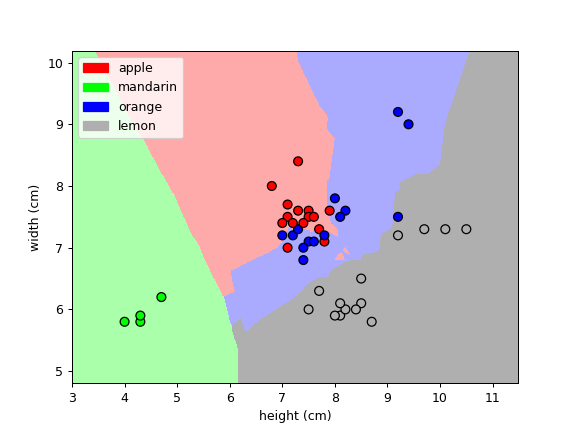

In [12]:
# ayo kita plot
plot_fruit_knn(X_train, y_train, 5, 'uniform')  # n_neighbors = 5

### Let's predict new unseen object

In [12]:
# prediksi buah dengan mass 30gram, lebar 6cm and height 5 cm
fruit_prediction = knn.predict([[30, 6, 5]])
lookup_fruit_name[fruit_prediction[0]]

'mandarin'

In [13]:
# prediksi buah dengan mass 100gram, width 6cm and height 8 cm
fruit_prediction = knn.predict([[100, 6, 8]])
lookup_fruit_name[fruit_prediction[0]]

'lemon'